#Data cleaning and preprocessing


36.0
genders: ['Female' 'Male']
unique: ['Marketer' 'Curator' 'Businessperson' 'Photographer' 'Soldier' 'Other'
 'Navigator' 'Therapist' 'Web Developer' 'Ecologist' 'Pilot' 'Surveyor'
 'Biologist' 'Journalist' 'Engineer Assistant' 'Technician' 'Videographer'
 'Sailor' 'Game Designer' 'Physiotherapist' 'Librarian' 'Baker'
 'Social Worker' 'Farmer' 'Data Analyst' 'Auditor' 'Mathematician'
 'Producer' 'Project Manager' 'Scientist' 'Athlete' 'Driver' 'Paramedic'
 'Research Assistant' 'Software Developer' 'Sommelier' 'Dancer' 'Mechanic'
 'Archaeologist' 'Accountant' 'Politician' 'Teacher' 'Zoologist' 'Doctor'
 'Programmer' 'Ux Designer' 'Writer' 'Historian' 'Architect' 'Barista'
 'Strategist' 'Translator' 'Consultant' 'Interior Designer' 'Operator'
 'Actor' 'Electrician' 'Carpenter' 'Astronomer' 'Chef' 'Coach' 'Geologist'
 'Nurse' 'Planner' 'Comedian' 'Designer' 'Animator' 'Physicist'
 'Firefighter' 'Lawyer' 'Lecturer' 'Judge' 'Police Officer' 'Professor'
 'Director' 'Manager' 'Musician' 'A

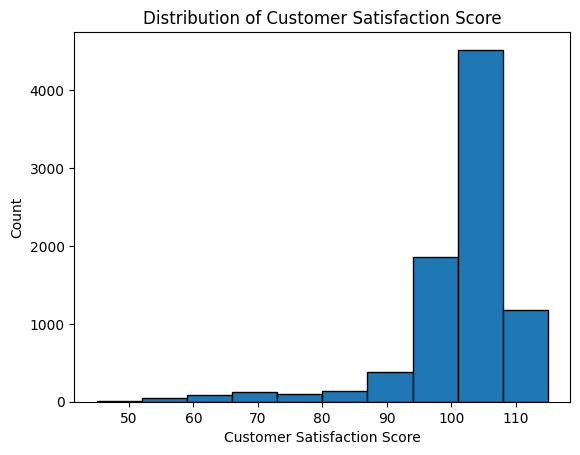

count    8449.000000
mean      101.453334
std         9.452920
min        45.030000
25%       100.000000
50%       102.000000
75%       107.000000
max       115.000000
Name: Customer Satisfaction Score, dtype: float64
Satisfaction_Level
Low       4422
Medium    2728
High      1299
Name: count, dtype: int64
   Customer Satisfaction Score Satisfaction_Level
0                        105.0             Medium
1                        102.0                Low
2                        100.0                Low
3                        108.0               High
4                         97.0                Low
Remaining columns: ['Age', 'Gender', 'Occupation', 'Travel Class', 'State of Residence', 'Duration of Stay (Days)', 'Number of Companions', 'Purpose of Travel', 'Special Requests', 'Loyalty Program Member', 'Total Price', 'DestinationCity', 'DestinationCountry', 'Lead Time (Days)', 'Satisfaction_Level']


In [ ]:
import pandas as pd
import numpy as np


# Load dataset
df = pd.read_csv("travel.csv")


# -----------------
# 1. AGE
# -----------------
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
median_age = df['Age'].median()
print(median_age)
df['Age'] = df['Age'].fillna(median_age)
df.loc[(df['Age'] < 0) | (df['Age'] > 120), 'Age'] = median_age


# -----------------
# 2. GENDER
# -----------------

print("genders:", df['Gender'].unique())
df['Gender'] = df['Gender'].str.strip().str.lower()
gender_map = {
'm': 'Male', 'male': 'Male',
'f': 'Female', 'female': 'Female'
}
df['Gender'] = df['Gender'].map(gender_map).fillna(df['Gender'])


# -----------------
# 3. OCCUPATION
# -----------------
df['Occupation'] = df['Occupation'].fillna('Unknown').str.strip().str.title()
print("unique:", df['Occupation'].unique())



# -----------------
# 4. TRAVEL CLASS
# -----------------
df['Travel Class'] = df['Travel Class'].str.strip().str.title()
print("unique:", df['Travel Class'].unique())
print(df['Travel Class'].isnull().sum())



# -----------------
# 5. DESTINATION
# -----------------
df['Destination'] = df['Destination'].str.strip().str.title()
df[['DestinationCity', 'DestinationCountry']] = df['Destination'].str.split(',', n=1, expand=True)
df['DestinationCity'] = df['DestinationCity'].str.strip()
df['DestinationCountry'] = df['DestinationCountry'].str.strip()
df = df.drop(columns=['Destination'])
print(df)



# -----------------
# 6. STATE OF RESIDENCE
# -----------------
df['State of Residence'] = df['State of Residence'].fillna('Unknown').str.strip().str.title()
print("unique:", df['State of Residence'].unique())


# -----------------
# 7. DURATION OF STAY
# -----------------
df['Duration of Stay (Days)'] = pd.to_numeric(df['Duration of Stay (Days)'], errors='coerce')
df['Duration of Stay (Days)'] = df['Duration of Stay (Days)'].fillna(0)
df.loc[df['Duration of Stay (Days)'] < 0, 'Duration of Stay (Days)'] = 0
df['Duration of Stay (Days)'] = df['Duration of Stay (Days)'].round(0).astype(int)
print(df['Duration of Stay (Days)'].head(10))



# -----------------
# 8. NUMBER OF COMPANIONS
# -----------------
df['Number of Companions'] = pd.to_numeric(df['Number of Companions'], errors='coerce')
df['Number of Companions'] = df['Number of Companions'].fillna(0).astype(int)
df.loc[df['Number of Companions'] < 0, 'Number of Companions'] = 0


# -----------------
# 9. PURPOSE OF TRAVEL
# -----------------
# Clean purpose column
df['Purpose of Travel'] = (df['Purpose of Travel'].fillna('unknown').str.strip().str.title())
df.loc[df['Purpose of Travel'] == '', 'Purpose of Travel'] = 'unknown'

print("unique:", df['Purpose of Travel'].unique())


# -----------------
# 10. TRANSPORTATION TYPE
# -----------------

df = df.drop(columns=['Transportation Type'])


# -----------------
# 11. BOOKING & DEPARTURE DATE
# -----------------
df['Booking Date'] = pd.to_datetime(df['Booking Date'], errors='coerce')
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
df = df[df['Booking Date'].notna() & df['Departure Date'].notna()]
df = df[df['Booking Date'] <= df['Departure Date']]
df['Lead Time (Days)'] = (df['Departure Date'] - df['Booking Date']).dt.days
df = df.drop(columns=['Booking Date', 'Departure Date'])
print(df.head())
print("Remaining columns:", df.columns.tolist())



# -----------------
# 12. SPECIAL REQUESTS
# -----------------
print("Unique Special Requests:", df['Special Requests'].unique())
df['Special Requests'] = df['Special Requests'].fillna('None').str.strip()
print("Unique Special Requests:", df['Special Requests'].unique())



# -----------------
# 13. LOYALTY PROGRAM MEMBER
# -----------------
df['Loyalty Program Member'] = df['Loyalty Program Member'].fillna('Unknown').str.strip().str.title()

print("Unique values (cleaned):", df['Loyalty Program Member'].unique())


# -----------------
# 15. TOTAL PRICE
# -----------------
df['Total Price'] = pd.to_numeric(df['Total Price'], errors='coerce')
df = df[df['Total Price'] > 0]


import matplotlib.pyplot as plt

plt.hist(df['Customer Satisfaction Score'], bins=10, edgecolor='black')
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Count')
plt.title('Distribution of Customer Satisfaction Score')
plt.show()

print(df['Customer Satisfaction Score'].describe())


df['Satisfaction_Level'] = pd.qcut(
    df['Customer Satisfaction Score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

print(df['Satisfaction_Level'].value_counts())
print(df[['Customer Satisfaction Score', 'Satisfaction_Level']].head())
df = df.drop(columns=['Customer Satisfaction Score'])


print("Remaining columns:", df.columns.tolist())

df.to_csv("travel_cleaned.csv", index=False)

#Model Creation

In [ ]:
# -----------------
# CLASSIFICATION MODEL PIPELINE
# -----------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ✅ Assume df is your cleaned dataset
df = pd.read_csv("/content/travel_cleaned.csv")
# -----------------
# 1. TARGET & FEATURES
# -----------------
target = "Satisfaction_Level"   # The classification target
X = df.drop(columns=[target])
y = df[target]

# -----------------
# 2. HANDLE CATEGORICAL VARIABLES
# -----------------
# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# -----------------
# 3. SPLIT DATA
# -----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------
# 4. SCALE FEATURES (for models like Logistic Regression, SVM)
# -----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------
# 5. TRAIN MODELS
# -----------------

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Support Vector Machine
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# -----------------
# 6. EVALUATION
# -----------------
models = {
    "Logistic Regression": (y_pred_log, y_test),
    "Random Forest": (y_pred_rf, y_test),
    "Decision Tree": (y_pred_dt, y_test),
    "SVM": (y_pred_svm, y_test)
}

for name, (y_pred, y_true) in models.items():
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))



Logistic Regression Results:
Accuracy: 0.5344895545920378
Confusion Matrix:
 [[ 246  278  285]
 [ 186 2133  328]
 [ 216 1069  333]]
Classification Report:
               precision    recall  f1-score   support

        High       0.38      0.30      0.34       809
         Low       0.61      0.81      0.70      2647
      Medium       0.35      0.21      0.26      1618

    accuracy                           0.53      5074
   macro avg       0.45      0.44      0.43      5074
weighted avg       0.49      0.53      0.50      5074


Random Forest Results:
Accuracy: 0.5737091052424123
Confusion Matrix:
 [[ 391  261  157]
 [ 121 2160  366]
 [ 224 1034  360]]
Classification Report:
               precision    recall  f1-score   support

        High       0.53      0.48      0.51       809
         Low       0.63      0.82      0.71      2647
      Medium       0.41      0.22      0.29      1618

    accuracy                           0.57      5074
   macro avg       0.52      0.51      